In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
from decimal import *
from scipy.optimize import fsolve


In [104]:
d = 70 #microns ???
wave = 0.632 #wavelength in microns; HeNe laser
alpha = np.linspace(0,90,700)
theta = 71.56
beta = 2*theta - alpha


In [105]:
#Zhao eqn (11)
U2 = (pi*d/wave)*np.cos(alpha)*((np.sin(theta-beta))/(np.cos(theta-alpha)))+np.tan(theta-alpha)

#Sinc function:
I2 = (np.sin(U2)/U2)**2

U1 = (pi*d/wave)*np.cos(beta)*((np.sin(theta-alpha))/(np.cos(theta-beta)))+np.tan(theta-beta)
I1 = (np.sin(U1)/U1)**2

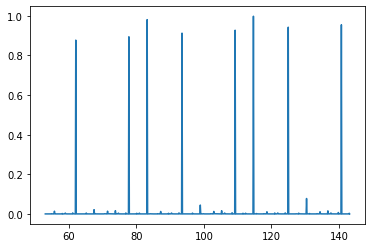

In [111]:
plt.plot(beta, I1)
# plt.xlim(-10,10)

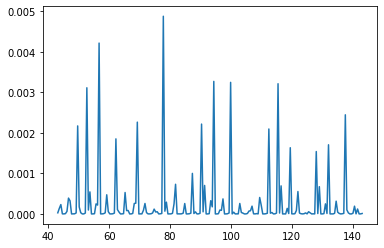

In [48]:
plt.plot(beta, I2)

### Zhaos example

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


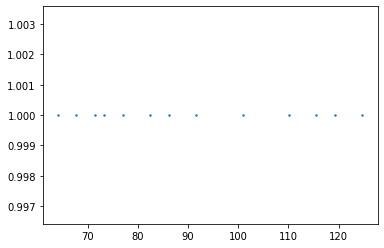

In [24]:
#Zhao's example
d = 3.1646 #microns
wave = 0.632 #wavelength in microns; HeNe laser
alpha = np.linspace(0,90,50)
theta = 63.28
beta = 2*theta - alpha

#Zhao eqn (11)
U2_z = (pi*d/wave)*np.cos(alpha)*((np.sin(theta-beta)/np.cos(theta-alpha))+np.tan(theta-alpha))
#Zhao eqn (9)

#Sinc function:
I2_z = (np.sin(U2_z)/U2_z)**2

plt.scatter(beta, I2_z, s= 2)
# plt.ylim(0.9999, 1.0001)

### Engman's example

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


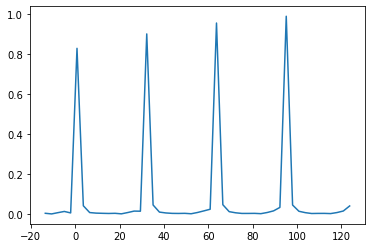

In [95]:
#Engman's example
d = 3.1646 #microns
wave = 0.632 #wavelength in microns; HeNe laser
alpha = np.linspace(0,140)
theta = 63.28
beta = 2*theta - alpha
beta_not = beta - beta/1000

#Engman correction factor:
Cor = (np.cos(beta) + np.cos(2*theta-alpha))/2*np.cos(beta_not)

#Engman eqn (11)
U2_e = (np.pi*d/wave)*np.sin(2*theta-beta)-np.sin(alpha)

#Engman eqn (9)

#Sinc function:
I2_e = (np.sin(U2_e)/U2_e)**2

plt.plot(beta, I2_e)

In [66]:
alpha_ex = [-0.75, -0.42, -0.42, 3.4, -17.23]
beta_ex = [12.31, 12.24, 8.65, 12.73, -55.23]

# for i in alpha_ex:
#     z = 2*62.4 - i
#     print(z)

for i,j in zip(alpha_ex, beta_ex):
    
    U_eng = (pi*d/wave)*np.sin(2*theta-i)-np.sin(j)
    print(U_eng)
    

15.93959014971157
15.544725792379442
14.524561014557435
-9.53059151942955
-11.379574970685173


## solving for expected minima

In [26]:
d = 70 #microns ???
wave = 0.632 #wavelength in microns; HeNe laser
alpha = 10
theta = 71.56
# beta = 2*theta - alpha
n = 100

func = lambda beta : (n*wave/2)-(d/2)*np.cos(beta)*((np.sin(theta-alpha))/(np.cos(theta-beta))+np.tan(theta-beta))

# bet = np.linspace(-10, 10, 60)

# plt.plot(bet, func(bet))
# plt.xlabel("beta")
# plt.ylabel("expression value")
# plt.grid()
# plt.show()

beta_initial_guess = - alpha
beta_solution = fsolve(func, beta_initial_guess)

print("The solution is beta = %f" % beta_solution)

#testing the engman solution:
blthet = np.arcsin((n*wave)/(2*d*np.cos((alpha-beta_solution)/2)))
print('blthet', blthet)
# print('alpha-beta_solution', n*wave, 2*d*np.cos(alpha-beta_solution))



The solution is beta = -10.004763
blthet [-0.56906326]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


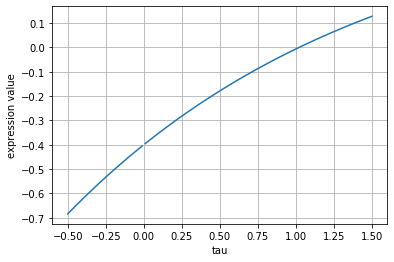

The solution is tau = 1.021651
at which the value of the expression is -0.000000


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the expression whose roots we want to find

a = 0.5
R = 1.6

func = lambda tau : R - ((1.0 - np.exp(-tau))/(1.0 - np.exp(-a*tau))) 

# Plot it

tau = np.linspace(-0.5, 1.5, 201)

plt.plot(tau, func(tau))
plt.xlabel("tau")
plt.ylabel("expression value")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

tau_initial_guess = 0.5
tau_solution = fsolve(func, tau_initial_guess)

print("The solution is tau = %f" % tau_solution)
print("at which the value of the expression is %f" % func(tau_solution))

## USING ENGMAN's method to get the damn thing to work


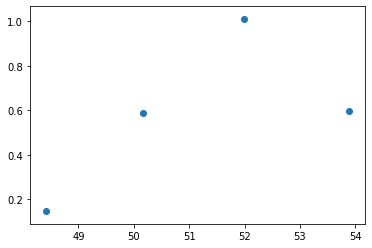

In [29]:
Intensititesarray1 = [0.282, 1.019, 0.282]
Intensititesarray2 = [0.149, 0.590, 1.008,0.597]
betaarray1 = [53.94, 55.93, 58.03]
betaarray2 = [48.41, 50.17, 51.99, 53.89]

plt.scatter(betaarray2,Intensititesarray2)
plt.show()



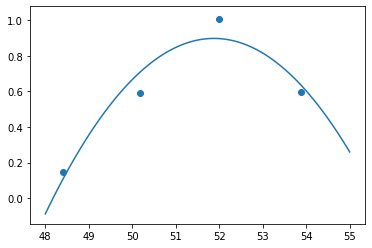

In [77]:

#polynomial fit with degree = 2
model2 = np.poly1d(np.polyfit(betaarray2, Intensititesarray2, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(48, 55, 100)
plt.scatter(betaarray2, Intensititesarray2)
plt.plot(polyline, model2(polyline))
plt.show()

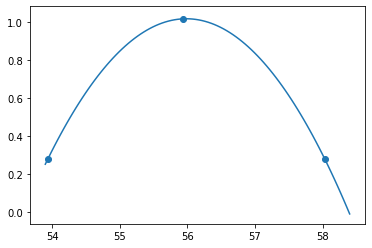

In [78]:

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(betaarray1, Intensititesarray1, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(53.9, 58.4, 100)
plt.scatter(betaarray1, Intensititesarray1)
plt.plot(polyline, model(polyline))
plt.show()

In [65]:
print(model2)

         2
-0.1764 x + 19.75 x - 551.7


In [62]:
#then take derivative, set to zero, solve for x

#second order gave 51.8 degrees for data set 2, and 55.6 deg for data set 1. not nearly precise enough. 
#I have no idea what I'm doing or how to do this

#values for data set 1 and 2 were pulled form table III in Engman a simple method, where they find a blaze of 64deg
#so my method isnt nearly precise enough

In [76]:
m = 88
lambdaa = 0.632
d = 50
al = 55.75
be = 68.97

theblaze = np.arcsin(m*lambdaa/(2*d*np.cos((al-be)/2)))
print(theblaze)

0.6276483509058093


## post convo with Gully

In [126]:
wavelength = 0.635 #in um
groovewidth = 10 #in um
groovespcaing = 27.36 #in um
beamwidth = 2000 #in um. 2000um = 2mm
inputangle = 1 #in degrees
inputangle = inputangle*np.pi/180 #in rad
blazeangle = 0 #in degrees

outputangle_deg = np.linspace(-20,20,5000) #1000 steps ==> 40/1000 = 0.04 so roughly equivalent to sampling in excel sheet
outputangle_rad = outputangle_deg*np.pi/180


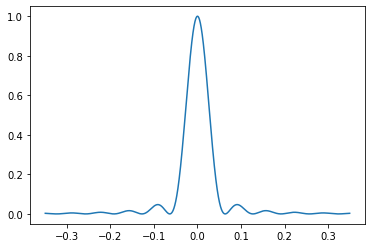

In [127]:
#arg for blaze envelope sinc function:
argBE = (groovewidth*np.pi/wavelength)*np.sin(outputangle_rad)
#sinc function to describe the blaze envelope:
BlazeEnvelope = (np.sin(argBE)/argBE)**2

plt.plot(outputangle_rad,BlazeEnvelope)


0.08104108566142416


(-0.1, 0.1)

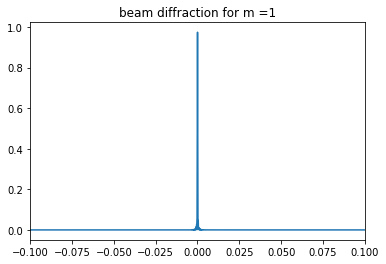

In [139]:
#Now, plot the beam diffraction for a given order
m = 1

#grating eqn gives a diffraction angle of:
diffangle = np.arcsin(np.sin(inputangle)+(m*wavelength/groovewidth))
print(diffangle)

#argument for beam diffraction sinc function:
argBD = (beamwidth*np.pi/wavelength)*np.sin(outputangle_rad-diffangle)
#Sinc function then is:
BeamDiffraction = (np.sin(argBD)/argBD)**2

plt.plot(outputangle_rad-diffangle,BeamDiffraction)
plt.title('beam diffraction for m ={}'.format(m))
plt.xlim(-0.1,0.1)

In [169]:
#Now, plot the beam diffraction for a given order
m = 3

#grating eqn gives a diffraction angle of:
diffangle3 = np.arcsin(np.sin(inputangle)+(m*wavelength/groovewidth))
print(diffangle3)

#argument for beam diffraction sinc function:
argBD3 = (beamwidth*np.pi/wavelength)*np.sin(outputangle_rad-diffangle3)
#Sinc function then is:
BeamDiffraction3 = (np.sin(argBD3)/argBD3)**2

# plt.plot(outputangle_rad-diffangle3,BeamDiffraction3)
# plt.title('beam diffraction for m ={}'.format(m))
# plt.xlim(-0.025,0.025)

0.20948113565416196


In [183]:
#Now, plot the beam diffraction for a given order
m = 2

#grating eqn gives a diffraction angle of:
diffangle2 = np.arcsin(np.sin(inputangle)+(m*wavelength/groovewidth))
print(diffangle2)

#argument for beam diffraction sinc function:
argBD2 = (beamwidth*np.pi/wavelength)*np.sin(outputangle_rad-diffangle2)
#Sinc function then is:
BeamDiffraction2 = (np.sin(argBD2)/argBD2)**2

# plt.plot(outputangle_rad-diffangle2,BeamDiffraction2)
# plt.title('beam diffraction for m ={}'.format(m))
# plt.xlim(-0.025,0.025)

0.14495955238385058


(-0.0025, 0.0025)

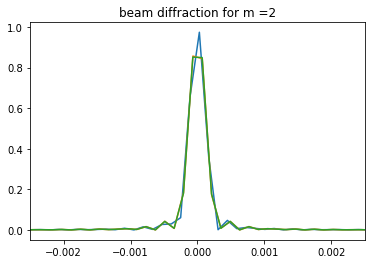

In [181]:
plt.plot(outputangle_rad-diffangle,BeamDiffraction)
plt.plot(outputangle_rad-diffangle2,BeamDiffraction2)
plt.plot(outputangle_rad-diffangle3,BeamDiffraction3)
plt.title('beam diffraction for m ={}'.format(m))
plt.xlim(-0.0025,0.0025)

0.08104108566142416


(-0.1, 0.1)

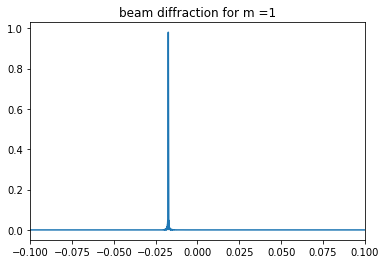

In [184]:
#now, include blaze in the sinc function argument. instead of sin(incident angle), incident angle = 2*blaze-diffracted angle

m = 1

#grating eqn gives a diffraction angle of:
diffangle = np.arcsin(np.sin(inputangle)+(m*wavelength/groovewidth))
print(diffangle)

#argument for beam diffraction sinc function:
argBD = (beamwidth*np.pi/wavelength)*(np.sin(2*blazeangle-inputangle)-np.sin(outputangle_rad-diffangle))
#Sinc function then is:
BeamDiffraction = (np.sin(argBD)/argBD)**2

plt.plot(outputangle_rad-diffangle,BeamDiffraction)
plt.title('beam diffraction for m ={}'.format(m))
plt.xlim(-0.1,0.1)
